In [1]:
# enable auto-reload of modules
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
import os
from pathlib import Path
from encoder import Encoder
from decoder import Decoder

/home/iamthewalrus/.local/lib/python3.10/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/iamthewalrus/.local/lib/python3.10/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


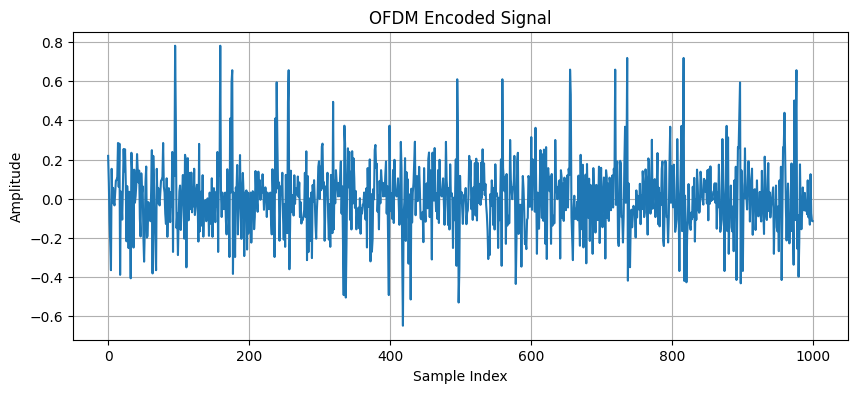

Encoded test.png into output.wav


In [6]:
encoder = Encoder()
encoder.encode("test.png")